In [1]:
# Customer Segmentation Data Analysis 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

filepath = r"C:\Users\Ahana\Desktop\Customer-Sales-Analysis\data\customer_segmentation_data.csv"

# Loading the data
print("=" * 80)
print("Loading Customer Segmentation Data")
print("=" * 80)

df = pd.read_csv(filepath)
print("Data loaded successfully!")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

# Initial Inspection
print("=" * 80)
print("Initial Data Inspection")
print("=" * 80)

print("\n1. First Few Rows:")
print("-" * 80)
display(df.head(10))

print("\n2. Data Info:")
print("-" * 80)
df.info()

print("\n3. Statistical Summary:")
print("-" * 80)
display(df.describe())

print("\n4. Column Names:")
print("-" * 80)
for idx, col in enumerate(df.columns, 1):
    print(f"{idx}. {col}")

# Data Quality Assessment 
print("\n" + "=" * 80)
print("Data Quality Assessment")
print("=" * 80)

# Missing values
print("\n1. Missing Values:")
print("-" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    display(missing_df)
else:
    print("No missing values have been found!")

# Duplicates
print("\n2. Duplicate Rows:")
print("-" * 80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Data Cleaning 

cleaned_df = df.copy()

# Removing duplicates
if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows")
    cleaned_df = cleaned_df.drop_duplicates()

# Handling missing values
if len(missing_df) > 0:
    print("Handling missing values")
    
    for col in missing_df.index:
        if cleaned_df[col].dtype in ['float64', 'int64']:
            cleaned_df[col].fillna(cleaned_df[col].median(), inplace=True)
            print(f"  - Filled {col} with median")
        else:
            cleaned_df[col].fillna(cleaned_df[col].mode()[0], inplace=True)
            print(f"  - Filled {col} with mode")

print(f"Cleaned data shape: {cleaned_df.shape[0]} rows × {cleaned_df.shape[1]} columns")

# Identify Feature Types

numerical_cols = cleaned_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_cols = cleaned_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  - {col}")

print(f"\nCategorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")

# Summary Stats

print(f"""
Customer Segmentation Data Analysis - Summary Report
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}

1. Dataset Overview 
   - Total Records: {cleaned_df.shape[0]:,}
   - Total Features: {cleaned_df.shape[1]}
   - Memory Usage: {cleaned_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB

2. Data Quality
   - Duplicate Rows Removed: {duplicates}
   - Missing Values Handled: {len(missing_df) > 0}

3. Feature Types 
   - Numerical Features: {len(numerical_cols)}
   - Categorical Features: {len(categorical_cols)}

4. Key Insights 
""")

# Age insights
if 'age' in cleaned_df.columns:
    print(f"   Age Statistics:")
    print(f"   - Average Age: {cleaned_df['age'].mean():.1f} years")
    print(f"   - Age Range: {cleaned_df['age'].min()}-{cleaned_df['age'].max()} years")

# Income insights
if 'income' in cleaned_df.columns:
    print(f"\n   Income Statistics:")
    print(f"   - Average Income: ${cleaned_df['income'].mean():,.2f}")
    print(f"   - Income Range: ${cleaned_df['income'].min():,.2f} - ${cleaned_df['income'].max():,.2f}")

# Spending Score insights
if 'spending_score' in cleaned_df.columns:
    print(f"\n   Spending Score:")
    print(f"   - Average: {cleaned_df['spending_score'].mean():.2f}")
    high_spenders = (cleaned_df['spending_score'] >= 70).sum()
    print(f"   - High Spenders (≥70): {high_spenders} ({high_spenders/len(cleaned_df)*100:.1f}%)")

# Purchase Frequency insights
if 'purchase_frequency' in cleaned_df.columns:
    print(f"\n   Purchase Frequency:")
    print(f"   - Average: {cleaned_df['purchase_frequency'].mean():.1f} purchases")
    print(f"   - Range: {cleaned_df['purchase_frequency'].min()}-{cleaned_df['purchase_frequency'].max()} purchases")

# Membership insights
if 'membership_years' in cleaned_df.columns:
    print(f"\n   Membership:")
    print(f"   - Average Years: {cleaned_df['membership_years'].mean():.1f} years")
    long_term = (cleaned_df['membership_years'] >= 5).sum()
    print(f"   - Long-term Members (≥5 years): {long_term} ({long_term/len(cleaned_df)*100:.1f}%)")

# Save the cleaned dataframe
output_path = r"C:\Users\Ahana\Desktop\Customer-Sales-Analysis\data\cleaned_customer_segmentation.csv"
cleaned_df.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")

Loading Customer Segmentation Data
Data loaded successfully!
Shape: 1000 rows × 9 columns

Initial Data Inspection

1. First Few Rows:
--------------------------------------------------------------------------------


,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
5,6,31,Other,57305,24,3,30,Home & Garden,86.85
6,7,19,Other,54319,68,5,43,Clothing,191.72
7,8,43,Male,108115,94,9,27,Groceries,734.56
8,9,53,Male,34424,29,6,7,Sports,951.71
9,10,55,Female,45839,55,7,2,Electronics,821.18



2. Data Info:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   age                   1000 non-null   int64  
 2   gender                1000 non-null   object 
 3   income                1000 non-null   int64  
 4   spending_score        1000 non-null   int64  
 5   membership_years      1000 non-null   int64  
 6   purchase_frequency    1000 non-null   int64  
 7   preferred_category    1000 non-null   object 
 8   last_purchase_amount  1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB

3. Statistical Summary:
--------------------------------------------------------------------------------


,id,age,income,spending_score,membership_years,purchase_frequency,last_purchase_amount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,43.783000,88500.800000,50.685000,5.46900,26.596000,492.348670
std,288.819436,15.042213,34230.771122,28.955175,2.85573,14.243654,295.744253
min,1.000000,18.000000,30004.000000,1.000000,1.00000,1.000000,10.400000
25%,250.750000,30.000000,57911.750000,26.000000,3.00000,15.000000,218.762500
50%,500.500000,45.000000,87845.500000,50.000000,5.00000,27.000000,491.595000
75%,750.250000,57.000000,116110.250000,76.000000,8.00000,39.000000,747.170000
max,1000.000000,69.000000,149973.000000,100.000000,10.00000,50.000000,999.740000



4. Column Names:
--------------------------------------------------------------------------------
1. id
2. age
3. gender
4. income
5. spending_score
6. membership_years
7. purchase_frequency
8. preferred_category
9. last_purchase_amount

Data Quality Assessment

1. Missing Values:
--------------------------------------------------------------------------------
No missing values have been found!

2. Duplicate Rows:
--------------------------------------------------------------------------------
Number of duplicate rows: 0
Cleaned data shape: 1000 rows × 9 columns

Numerical Columns (7):
  - id
  - age
  - income
  - spending_score
  - membership_years
  - purchase_frequency
  - last_purchase_amount

Categorical Columns (2):
  - gender
  - preferred_category

Customer Segmentation Data Analysis - Summary Report
Generated: 2026-02-16 13:15:40

1. Dataset Overview 
   - Total Records: 1,000
   - Total Features: 9
   - Memory Usage: 0.16 MB

2. Data Quality
   - Duplicate Rows Removed: 0
 


1. Distribution Plots for Numerical Features
--------------------------------------------------------------------------------


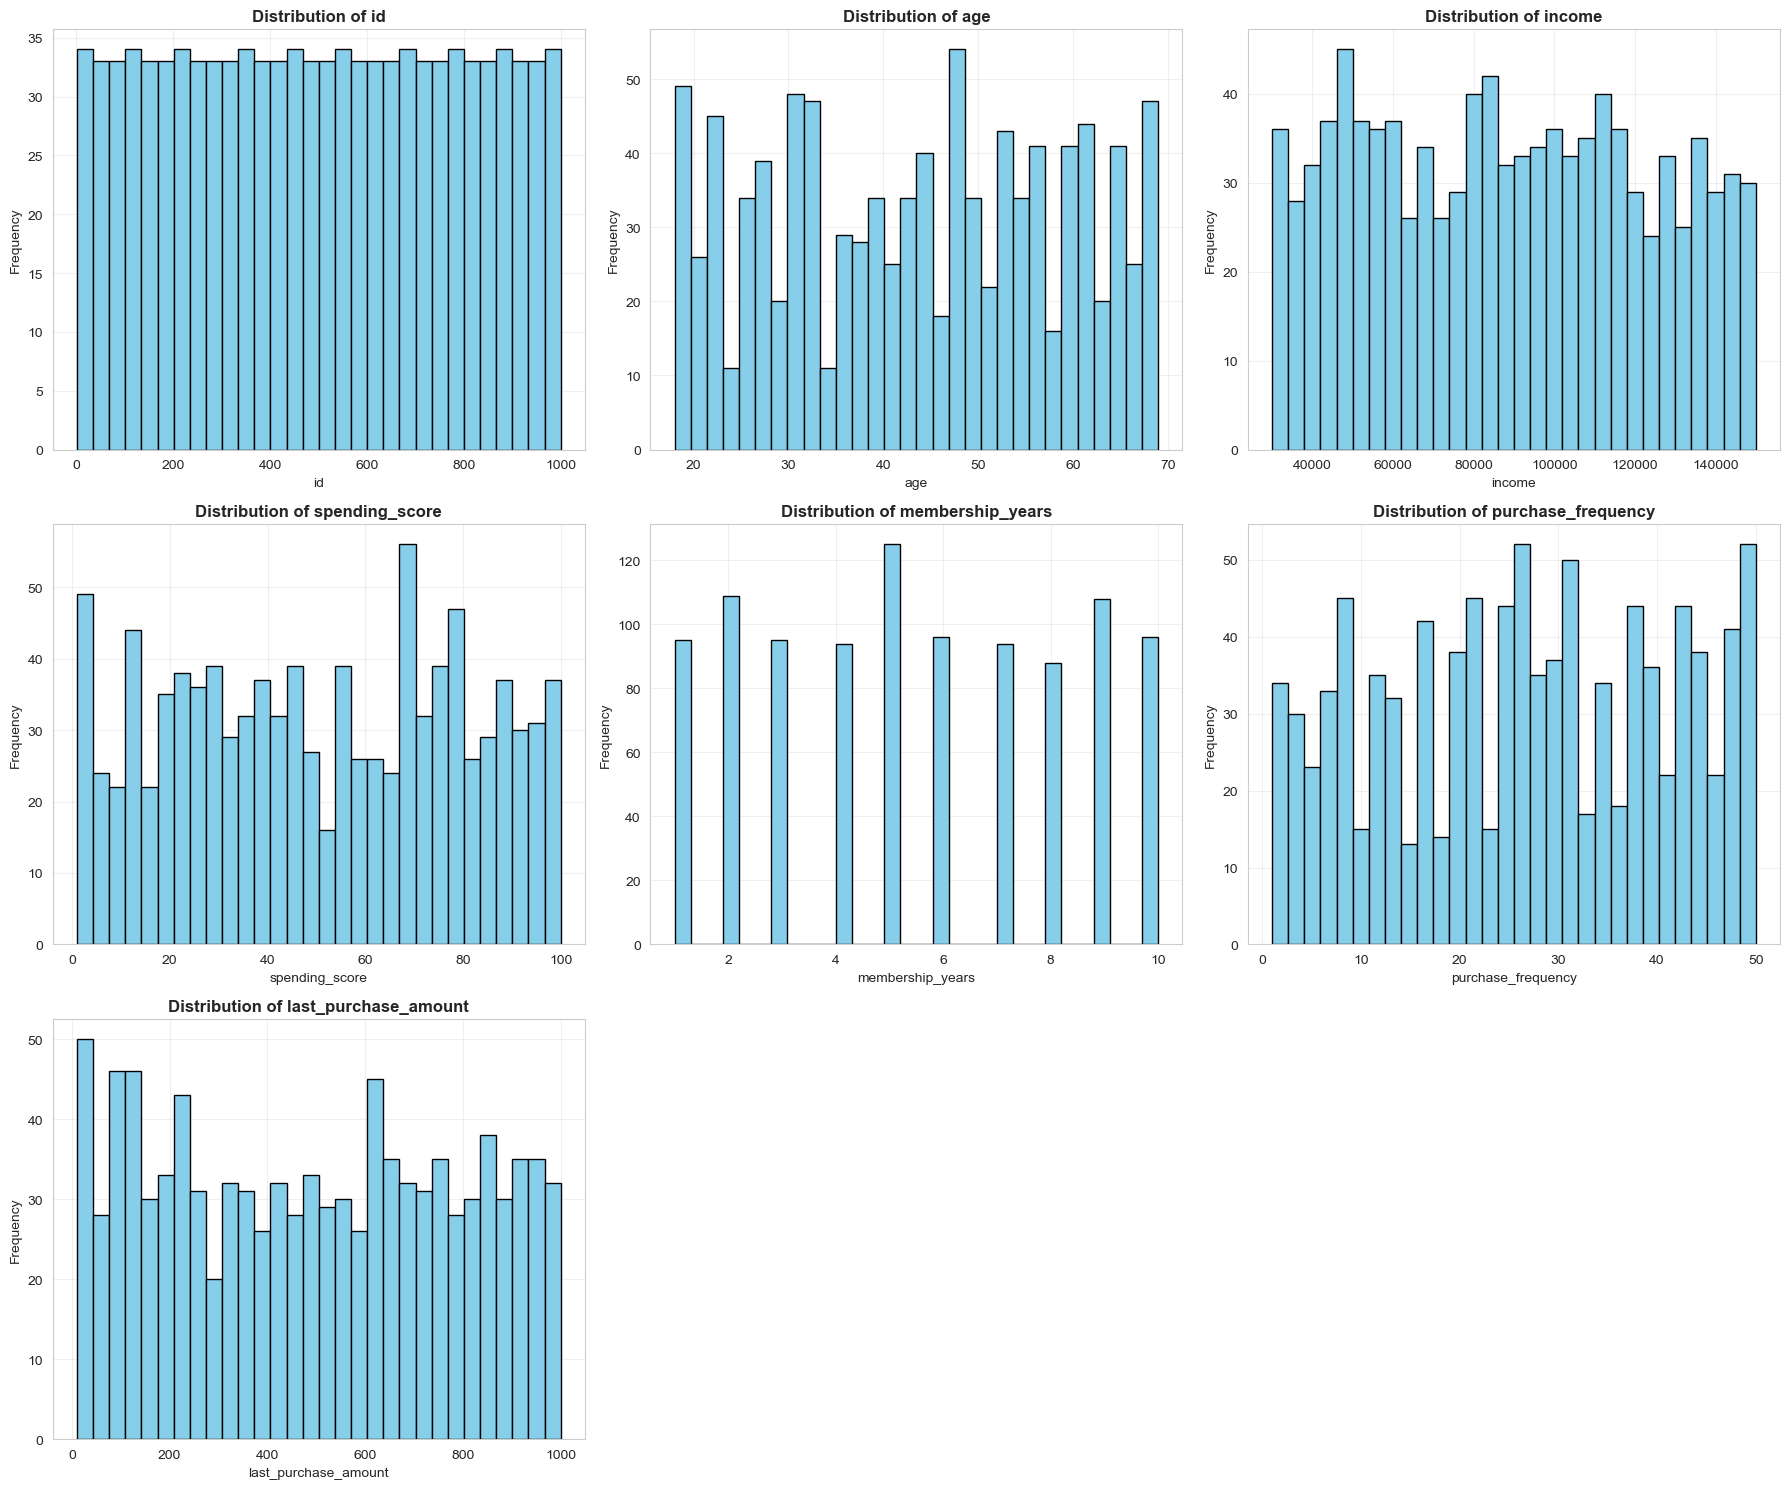

In [2]:
# Data Visualization 

# 1. Distribution of Numerical Features
if len(numerical_cols) > 0:
    print("\n1. Distribution Plots for Numerical Features")
    print("-" * 80)
    
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            cleaned_df[col].hist(bins=30, ax=axes[idx], edgecolor='black', color='skyblue')
            axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequency')
            axes[idx].grid(alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


2. Correlation Heatmap
--------------------------------------------------------------------------------


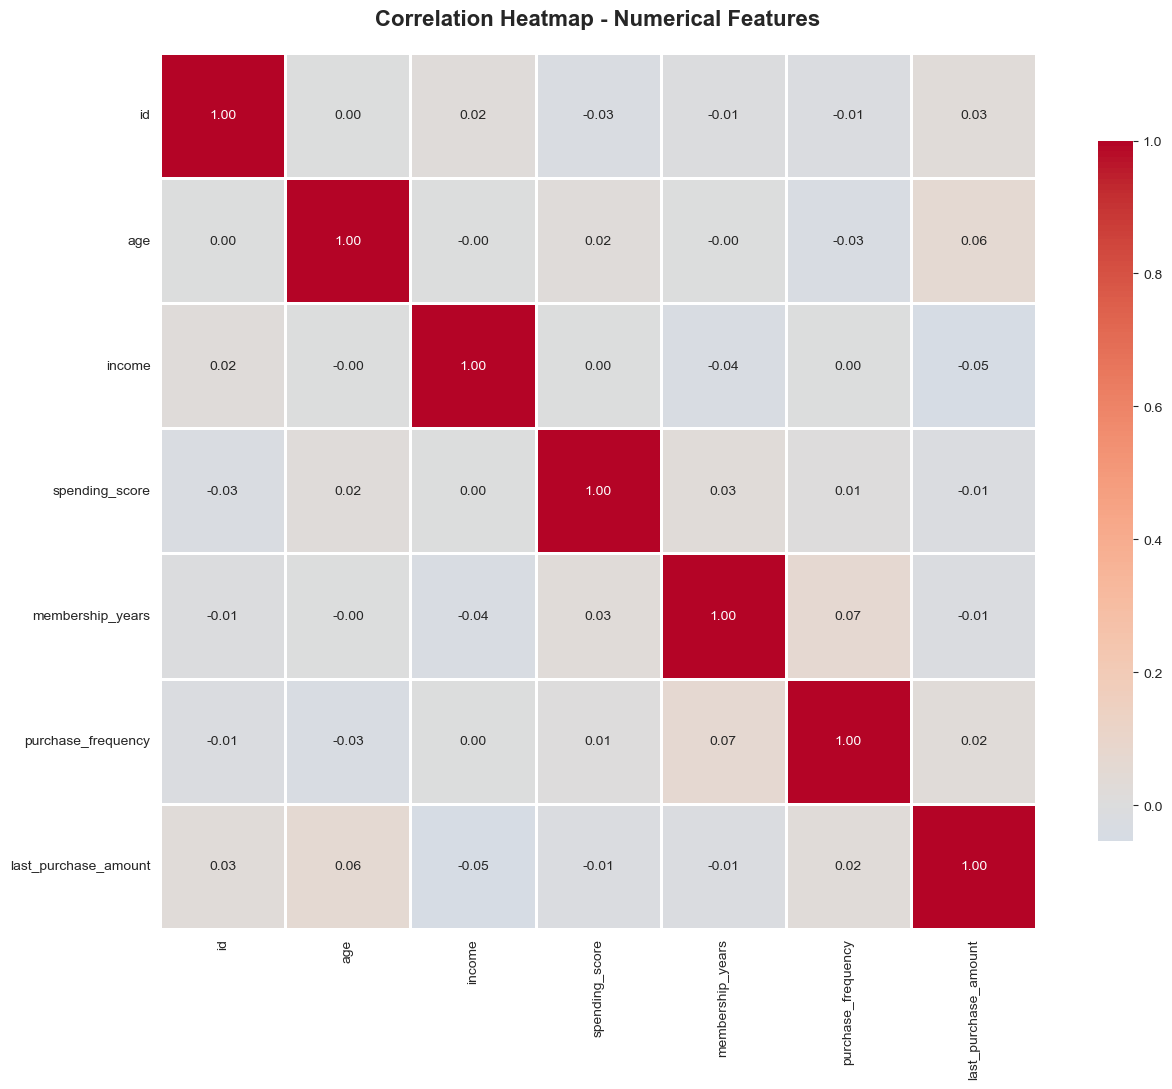

In [3]:
# 2. Correlation Heatmap
if len(numerical_cols) > 1:
    print("\n2. Correlation Heatmap")
    print("-" * 80)
    
    plt.figure(figsize=(14, 11))
    correlation_matrix = cleaned_df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
               fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap - Numerical Features', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()


3. Box Plots - Outlier Detection
--------------------------------------------------------------------------------


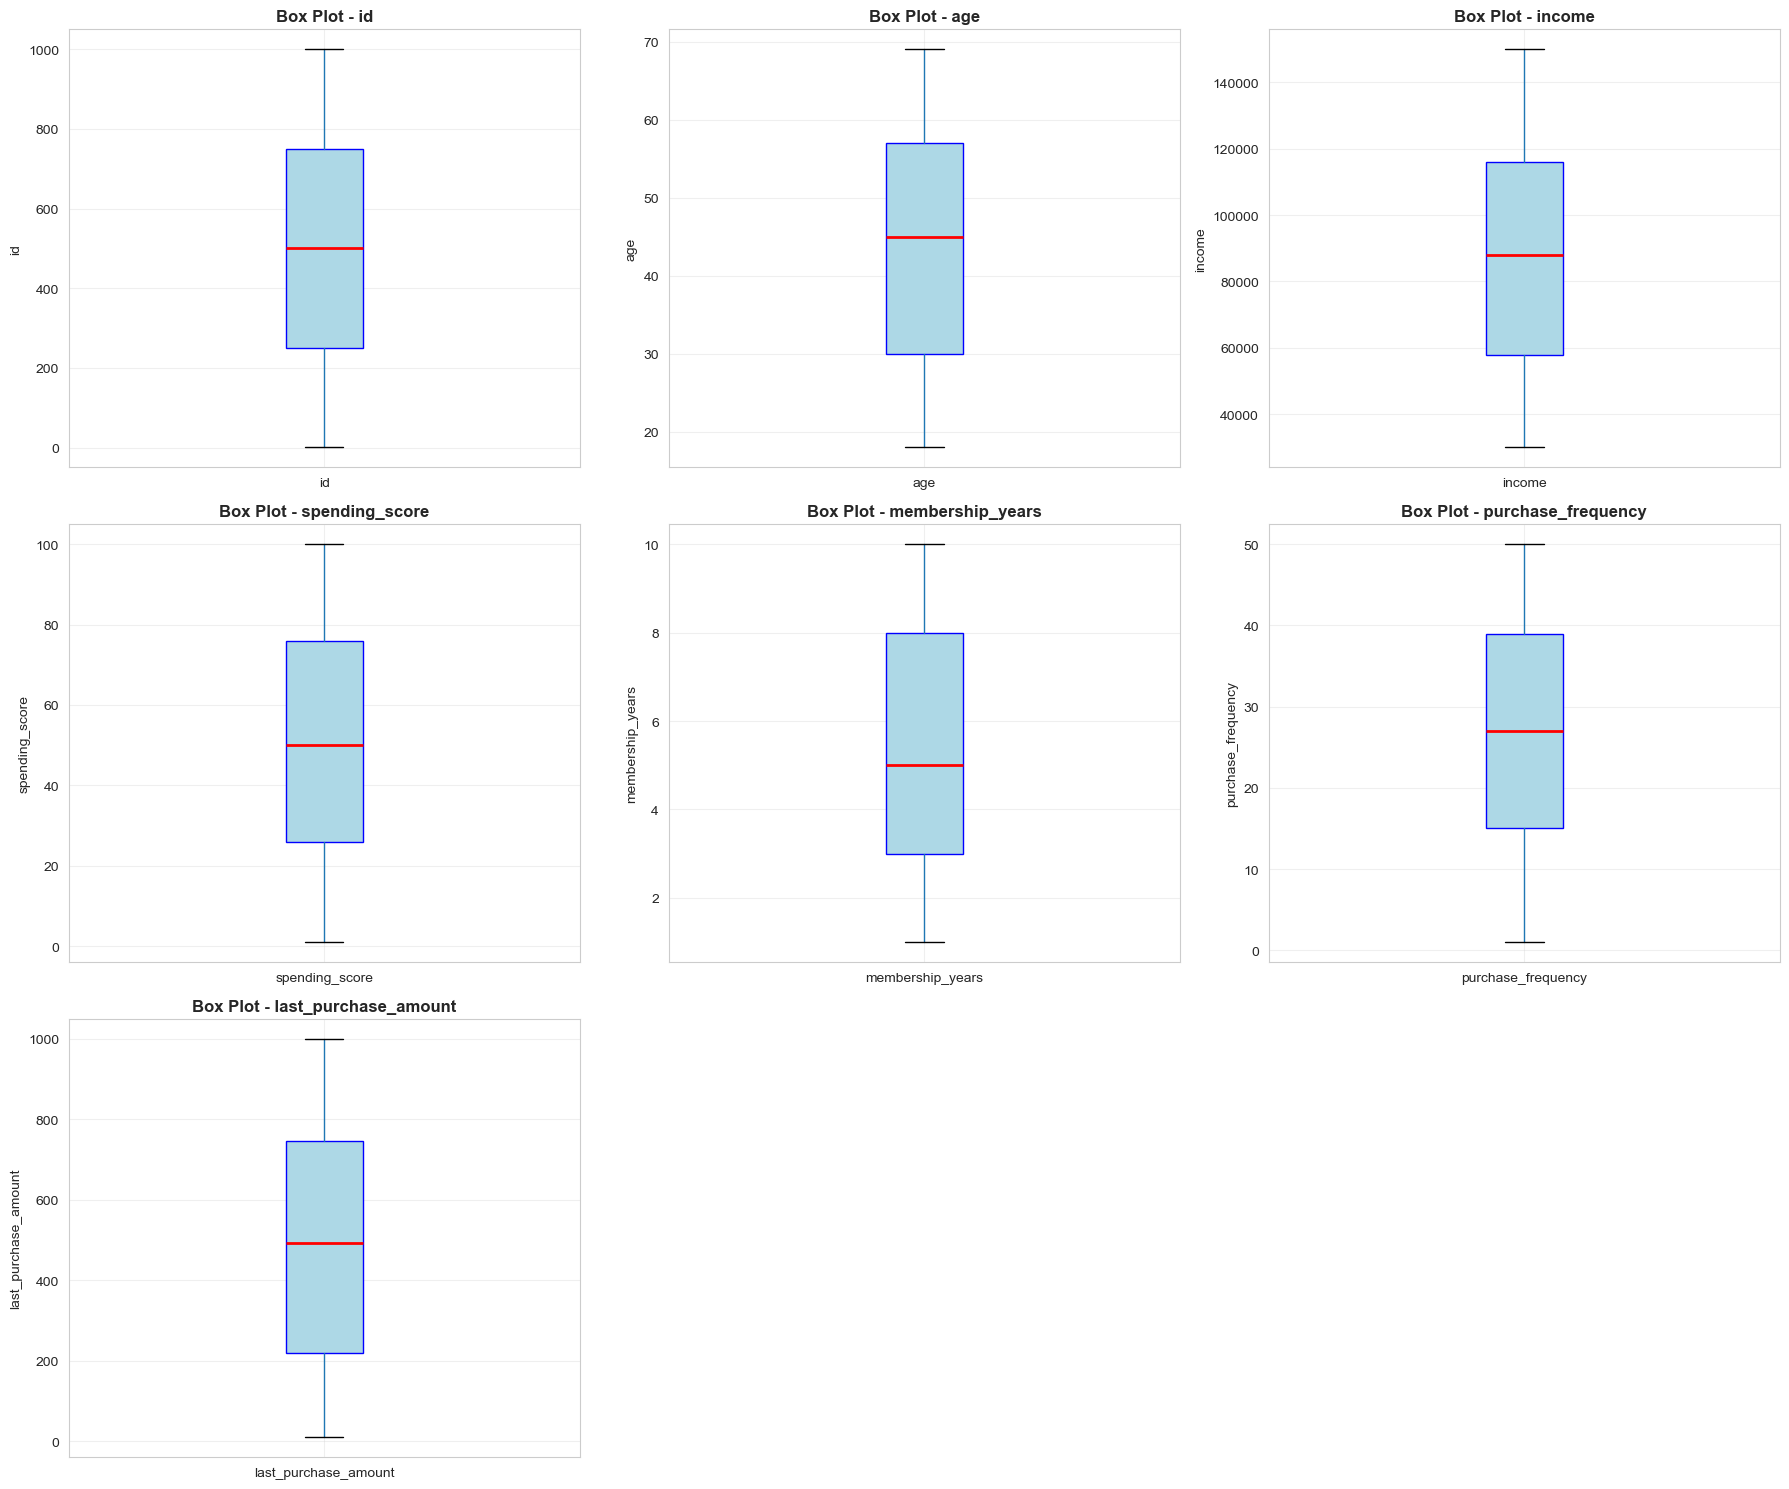

In [4]:
# 3. Box Plots for Outlier Detection
if len(numerical_cols) > 0:
    print("\n3. Box Plots - Outlier Detection")
    print("-" * 80)
    
    n_cols = min(3, len(numerical_cols))
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(numerical_cols):
        if idx < len(axes):
            cleaned_df.boxplot(column=col, ax=axes[idx], patch_artist=True,
                             boxprops=dict(facecolor='lightblue', color='blue'),
                             medianprops=dict(color='red', linewidth=2))
            axes[idx].set_title(f'Box Plot - {col}', fontsize=12, fontweight='bold')
            axes[idx].set_ylabel(col)
            axes[idx].grid(alpha=0.3)
    
    # Hide empty subplots
    for idx in range(len(numerical_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


4. Categorical Feature Analysis
--------------------------------------------------------------------------------


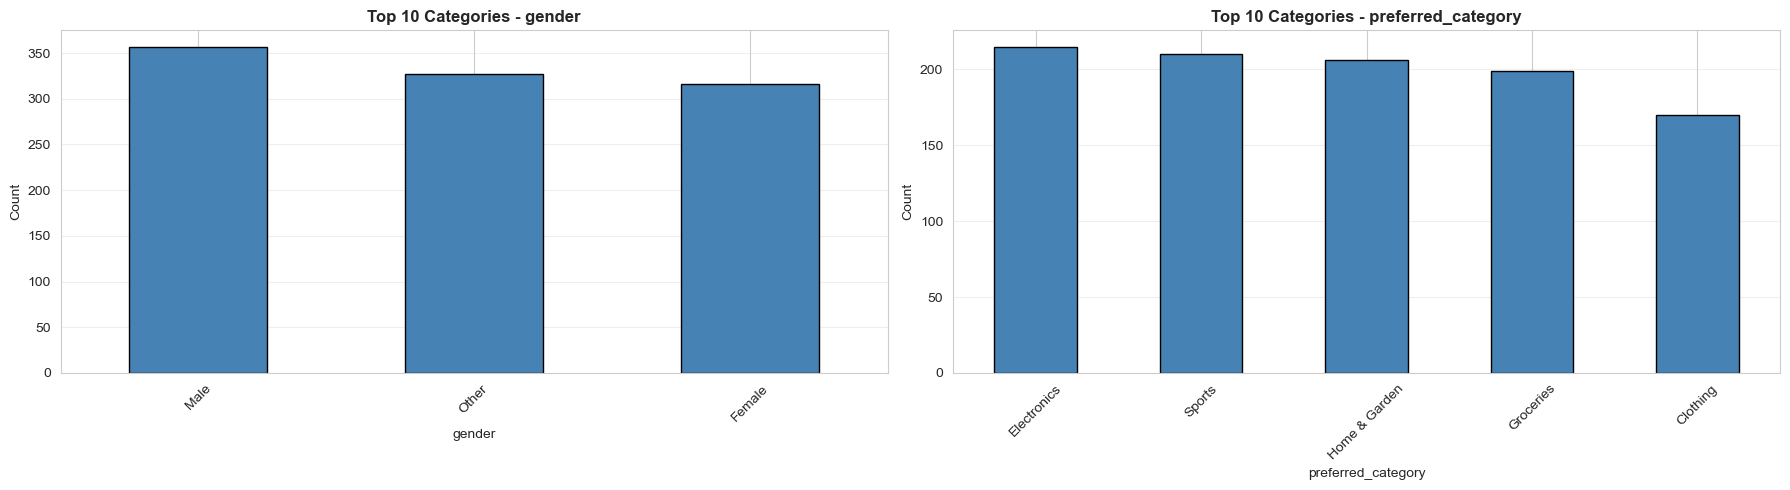

In [5]:
# 4. Categorical Feature Analysis
if len(categorical_cols) > 0:
    print("\n4. Categorical Feature Analysis")
    print("-" * 80)
    
    # Limit to top categorical columns for better visualization
    cols_to_plot = categorical_cols[:min(8, len(categorical_cols))]
    
    n_cols = min(2, len(cols_to_plot))
    n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for idx, col in enumerate(cols_to_plot):
        if idx < len(axes):
            value_counts = cleaned_df[col].value_counts().head(10)
            value_counts.plot(kind='bar', ax=axes[idx], color='steelblue', edgecolor='black')
            axes[idx].set_title(f'Top 10 Categories - {col}', fontsize=12, fontweight='bold')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Count')
            axes[idx].tick_params(axis='x', rotation=45)
            axes[idx].grid(alpha=0.3, axis='y')
    
    # Hide empty subplots
    for idx in range(len(cols_to_plot), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()


5. Spending Score Analysis
--------------------------------------------------------------------------------


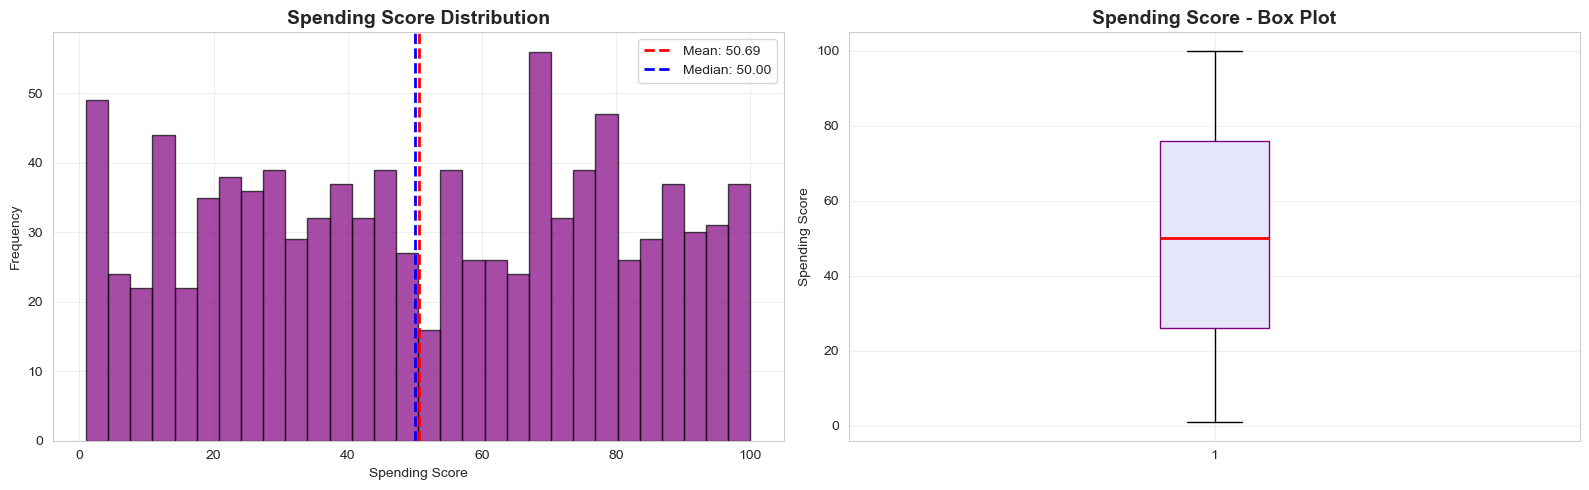


Spending Score Statistics:
  - Mean: 50.69
  - Median: 50.00
  - Min: 1.00
  - Max: 100.00
  - Std Dev: 28.96


In [6]:
# 5. Spending Score Analysis
if 'spending_score' in cleaned_df.columns:
    print("\n5. Spending Score Analysis")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Histogram
    axes[0].hist(cleaned_df['spending_score'], bins=30, color='purple', edgecolor='black', alpha=0.7)
    axes[0].set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Spending Score')
    axes[0].set_ylabel('Frequency')
    axes[0].axvline(cleaned_df['spending_score'].mean(), color='red', linestyle='--', 
                    linewidth=2, label=f'Mean: {cleaned_df["spending_score"].mean():.2f}')
    axes[0].axvline(cleaned_df['spending_score'].median(), color='blue', linestyle='--', 
                    linewidth=2, label=f'Median: {cleaned_df["spending_score"].median():.2f}')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Box plot
    axes[1].boxplot(cleaned_df['spending_score'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lavender', color='purple'),
                   medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Spending Score - Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Spending Score')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Spending Score Statistics
    print("\nSpending Score Statistics:")
    print(f"  - Mean: {cleaned_df['spending_score'].mean():.2f}")
    print(f"  - Median: {cleaned_df['spending_score'].median():.2f}")
    print(f"  - Min: {cleaned_df['spending_score'].min():.2f}")
    print(f"  - Max: {cleaned_df['spending_score'].max():.2f}")
    print(f"  - Std Dev: {cleaned_df['spending_score'].std():.2f}")


6. Income vs Spending Score Analysis
--------------------------------------------------------------------------------


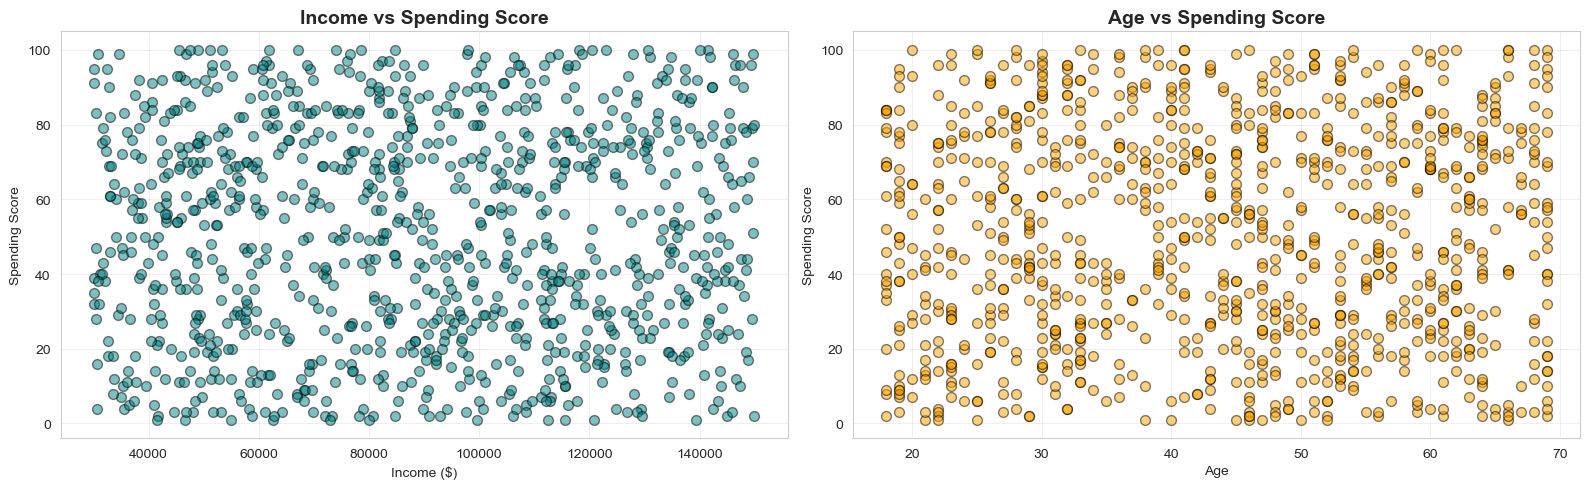

In [7]:
# 6. Income vs Spending Score Analysis
if 'income' in cleaned_df.columns and 'spending_score' in cleaned_df.columns:
    print("\n6. Income vs Spending Score Analysis")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Scatter plot
    axes[0].scatter(cleaned_df['income'], cleaned_df['spending_score'], 
                   alpha=0.5, color='teal', edgecolors='black', s=50)
    axes[0].set_title('Income vs Spending Score', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Income ($)')
    axes[0].set_ylabel('Spending Score')
    axes[0].grid(alpha=0.3)
    
    # Age distribution
    if 'age' in cleaned_df.columns:
        axes[1].scatter(cleaned_df['age'], cleaned_df['spending_score'], 
                       alpha=0.5, color='orange', edgecolors='black', s=50)
        axes[1].set_title('Age vs Spending Score', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Age')
        axes[1].set_ylabel('Spending Score')
        axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


7. Purchase Frequency Analysis
--------------------------------------------------------------------------------


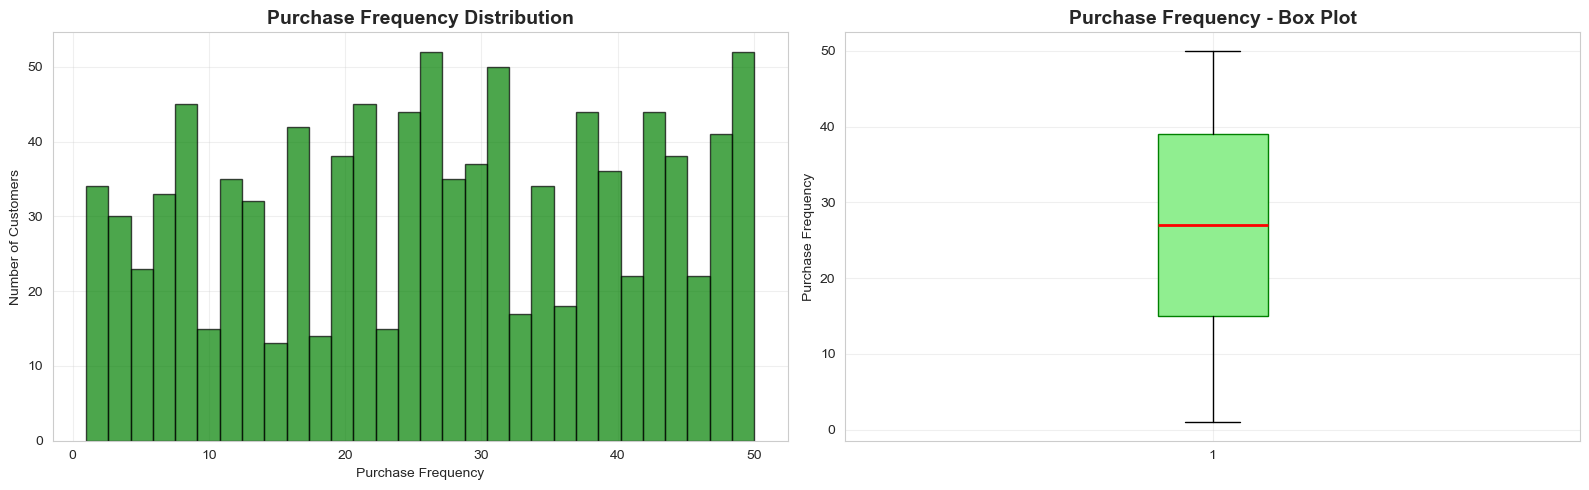

In [8]:
# 7. Purchase Frequency Analysis
if 'purchase_frequency' in cleaned_df.columns:
    print("\n7. Purchase Frequency Analysis")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Histogram
    axes[0].hist(cleaned_df['purchase_frequency'], bins=30, color='green', edgecolor='black', alpha=0.7)
    axes[0].set_title('Purchase Frequency Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Purchase Frequency')
    axes[0].set_ylabel('Number of Customers')
    axes[0].grid(alpha=0.3)
    
    # Box plot
    axes[1].boxplot(cleaned_df['purchase_frequency'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='lightgreen', color='green'),
                   medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Purchase Frequency - Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Purchase Frequency')
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()


8. Gender Distribution Analysis
--------------------------------------------------------------------------------


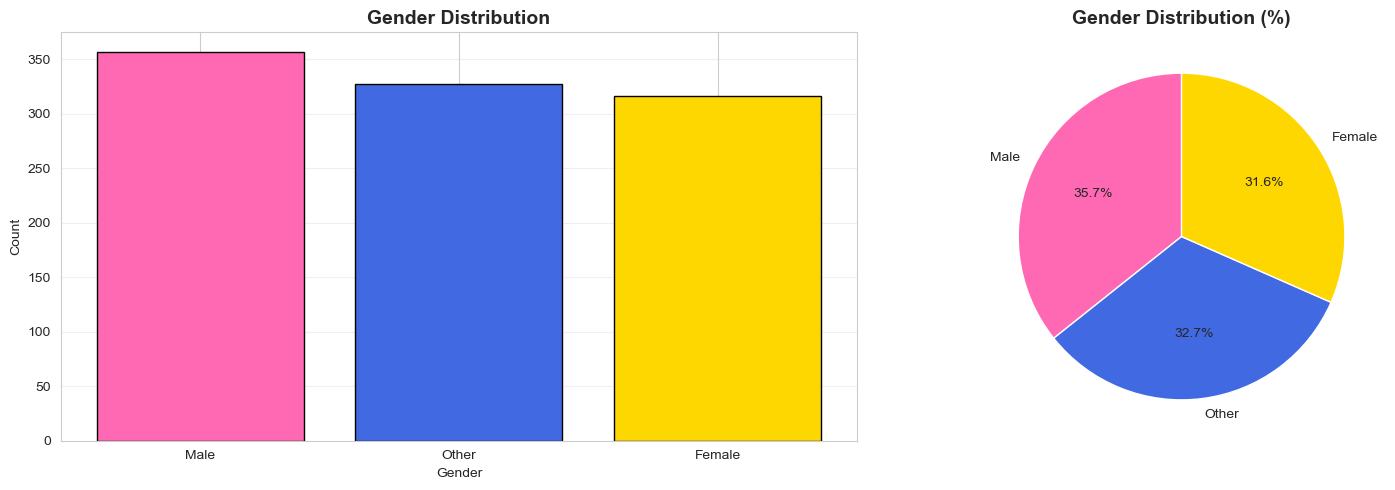

In [12]:
# 8. Gender Distribution
if 'gender' in cleaned_df.columns:
    print("\n8. Gender Distribution Analysis")
    print("-" * 80)
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # Count plot
    gender_counts = cleaned_df['gender'].value_counts()
    axes[0].bar(gender_counts.index, gender_counts.values, color=['#FF69B4', '#4169E1', '#FFD700'], edgecolor='black')
    axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Gender')
    axes[0].set_ylabel('Count')
    axes[0].grid(alpha=0.3, axis='y')
    
    # Pie chart
    axes[1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%',
               startangle=90, colors=['#FF69B4', '#4169E1', '#FFD700'])
    axes[1].set_title('Gender Distribution (%)', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()


9. Preferred Category Analysis
--------------------------------------------------------------------------------


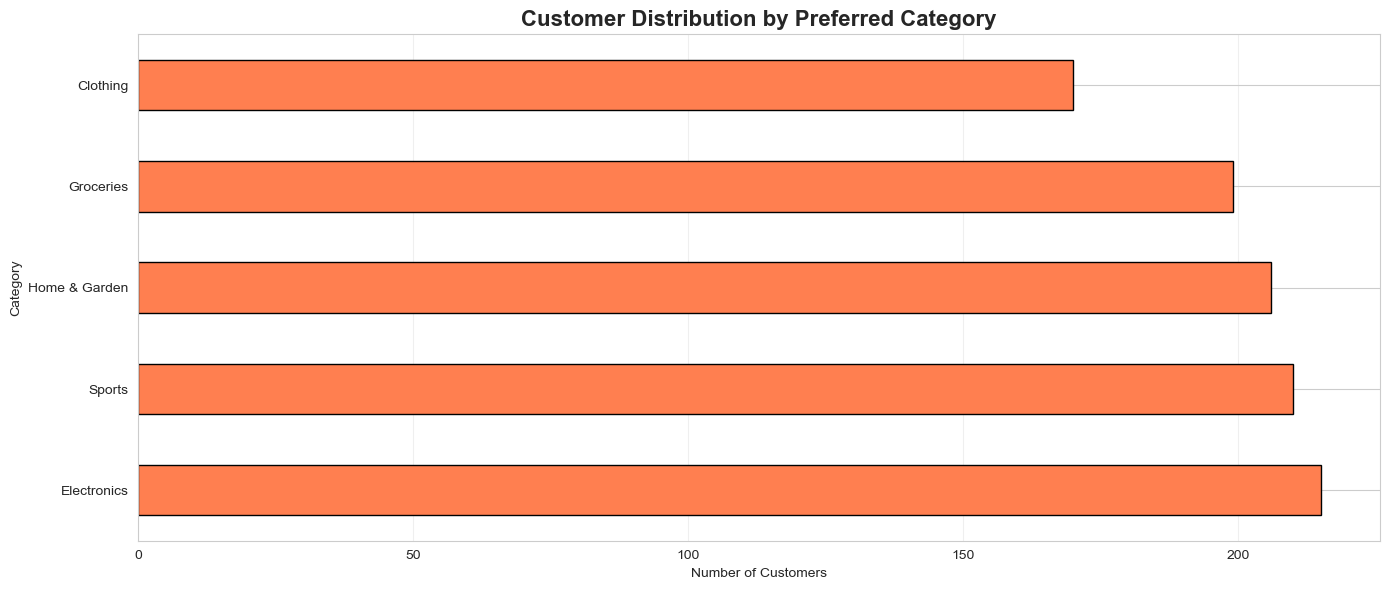


Category Distribution:
  - Electronics: 215 customers (21.5%)
  - Sports: 210 customers (21.0%)
  - Home & Garden: 206 customers (20.6%)
  - Groceries: 199 customers (19.9%)
  - Clothing: 170 customers (17.0%)


In [9]:
# 9. Preferred Category Analysis
if 'preferred_category' in cleaned_df.columns:
    print("\n9. Preferred Category Analysis")
    print("-" * 80)
    
    category_counts = cleaned_df['preferred_category'].value_counts()
    
    plt.figure(figsize=(14, 6))
    category_counts.plot(kind='barh', color='coral', edgecolor='black')
    plt.title('Customer Distribution by Preferred Category', fontsize=16, fontweight='bold')
    plt.xlabel('Number of Customers')
    plt.ylabel('Category')
    plt.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    print("\nCategory Distribution:")
    for category, count in category_counts.items():
        percentage = (count / len(cleaned_df)) * 100
        print(f"  - {category}: {count} customers ({percentage:.1f}%)")